In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from app.data.strategy import StrategyToGraph, Strategy, Backtest
from app.data.data_analyses import DataToGraphs
from app.graphs.graphs_constructor import CustomGraph
from app.structure.tickers import Tickers

In [2]:
ticker = 'SBER'

tickers = Tickers().get_netflow_tickers()
data = DataToGraphs(tickers).data

In [3]:
STR = Strategy(ticker, data)

min_data, max_data = STR.extremums
print('%s - order\n' % STR.order, 
      '%s - shift' % STR.shift)

180 - order
 30 - shift


In [5]:
BACK = Backtest(ticker, data)

min_d, max_d = BACK.extremums
print('%s - moving_average\n' % BACK.mov_avg,
      '%s - order_min\n' % BACK.order_min, 
      '%s - order_max\n' % BACK.order_max, 
      '%s - shift_min\n' % BACK.shift_min, 
      '%s - shift_max\n' % BACK.shift_max)

50 - moving_average
 180 - order_min
 300 - order_max
 30 - shift_min
 30 - shift_max



# Локальные экстремумы для графике накопленной позиции

В идеальном мире (с заглядываанием в будущее): 
    
- локальные экстремумы определяются однозначно
- добавляем лаг в 30 дней для принятия решения о выходе или выходе

Красные точки - покупка, зеленые - продажа

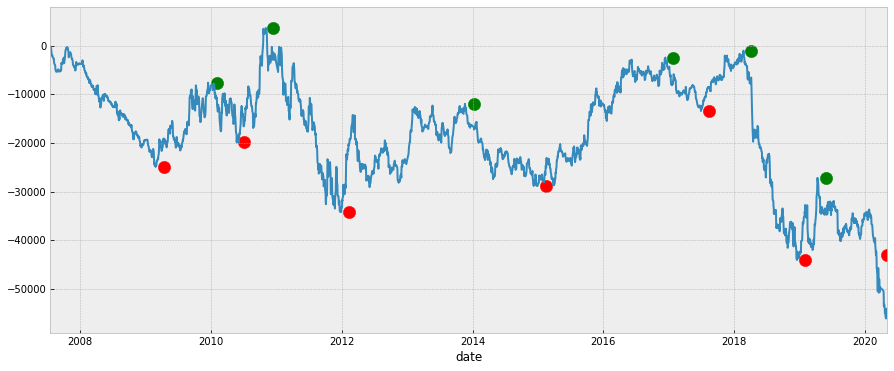

In [4]:
STR.get_cumulative_flow().plot(figsize = (15,6))


plt.scatter(min_data.index, min_data, c='r', s = 150)
plt.scatter(max_data.index, max_data, c='g', s = 150)


# Локальные экстремумы для графике накопленной позиции

В реальном мире (без заглядывания в будущее): 
    
- появляются ложные точки входа и выхода
- их количество можно уменьшить за счет скользящей средней, но помогает не сильно

Красные точки - покупка, зеленые - продажа

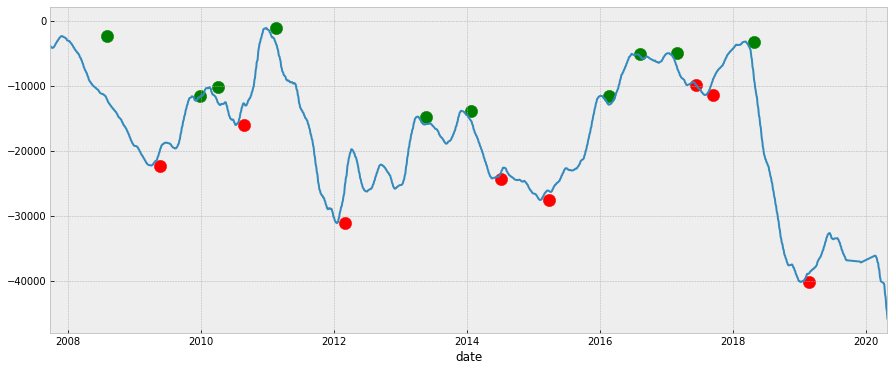

In [7]:
BACK.get_cumulative_flow_mov_avg().plot(figsize = (15,6))
plt.scatter(min_d.index, min_d, c='r', s = 150)
plt.scatter(max_d.index, max_d, c='g', s = 150)

# Доходность в идельном мире

Long - нет непокрытых продаж,
Long_short - возможны непокрытые продажи

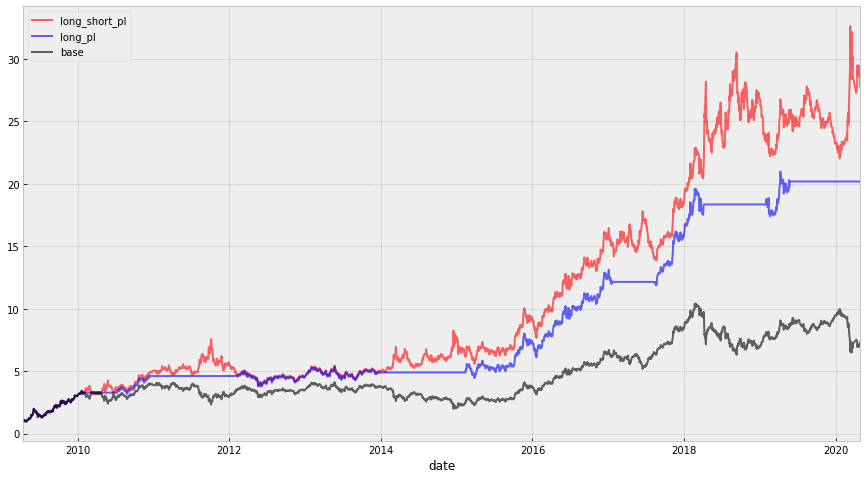

In [8]:
STR.get_performance().plot(figsize = (15,8), color = ['r', 'b', 'black'], alpha = 0.6)

# Доходность в реальном мире

правда не исключаю, что тут есть оверфит

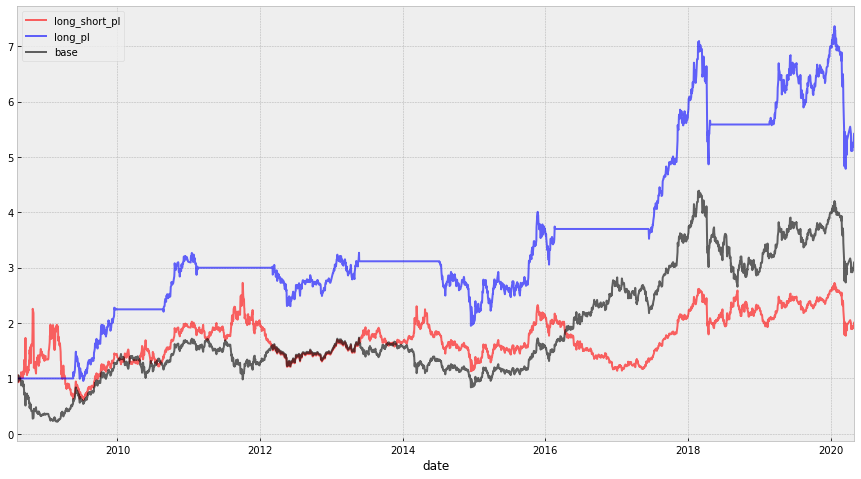

In [9]:
BACK.get_performance().plot(figsize = (15,8), color = ['r', 'b', 'black'], alpha = 0.6)